# Importing neccessary packages to build the neural network

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Building the model with three hidden layes- **32**, **64** and **128** respectively.

In [6]:
class SDNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.first_hidden_layer = nn.Linear(in_features=1, out_features=32)
        self.second_hidden_layer = nn.Linear(in_features=32, out_features=64)
        self.third_hidden_layer = nn.Linear(in_features=64, out_features=128)
        self.output_layer = nn.Linear(in_features=128, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = torch.relu(self.first_hidden_layer(x))
        x = torch.relu(self.second_hidden_layer(x))
        x = torch.relu(self.third_hidden_layer(x))
        x = self.output_layer(x)
        return x

# Instantiation of the model and see it's parameters

In [11]:
torch.manual_seed(7)
model = SDNN()
model.state_dict()

OrderedDict([('first_hidden_layer.weight',
              tensor([[ 0.0698],
                      [-0.6024],
                      [ 0.3184],
                      [ 0.3138],
                      [-0.5345],
                      [-0.1499],
                      [-0.5858],
                      [ 0.2595],
                      [-0.2694],
                      [ 0.7025],
                      [ 0.7099],
                      [ 0.1019],
                      [-0.4263],
                      [-0.5874],
                      [-0.1098],
                      [-0.2814],
                      [ 0.4408],
                      [-0.8539],
                      [ 0.9398],
                      [-0.7844],
                      [ 0.7658],
                      [-0.1737],
                      [ 0.5144],
                      [ 0.3897],
                      [ 0.0419],
                      [ 0.1865],
                      [ 0.7594],
                      [ 0.2572],
                      [ 0.5305],


# The polynomial to be solved

In [13]:
def polynomial(x):
    return 5*x*x*x - 8*x*x + 7*x + 1

# Generation and normalization of sample data

(tensor(-1.), tensor(1.), tensor(-1.), tensor(1.))

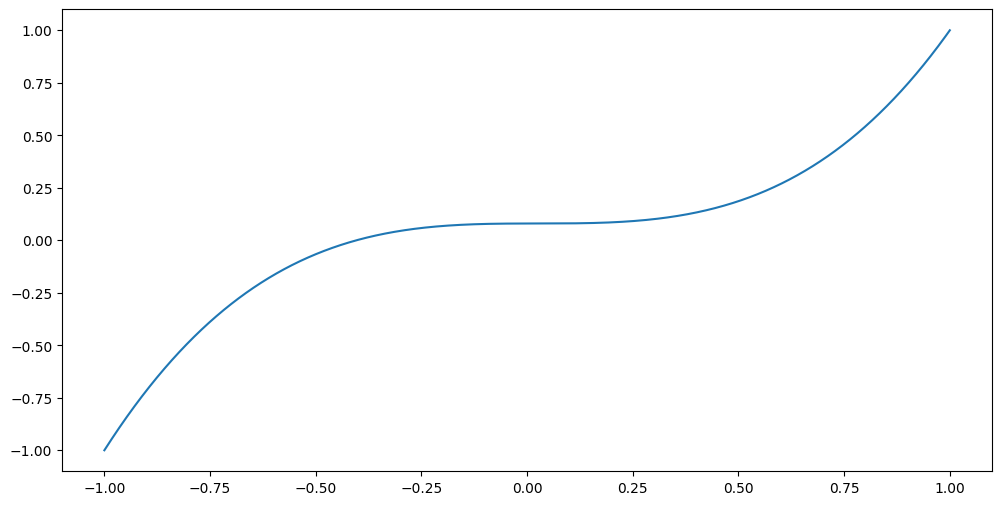

In [16]:
X = torch.arange(start=-20, end=20, step=0.0025)
y = polynomial(X)

#Normalizaing the data
a, b = -1, 1
X = ((X - min(X))/(max(X)-min(X)))*(b-a) + a
y = ((y - min(y))/(max(y)-min(y)))*(b-a) + a
plt.figure(figsize=(12, 6))
plt.plot(X, y)
min(X), max(X), min(y), max(y)


# Splitting the dataset into **90% for training**, **next 5% for validating** and rest **5% for testing**.

In [18]:
X, y = X.view(-1, 1), y.view(-1, 1)
size1, size2 = int(0.9*len(X)), int(0.95*len(X))

X_train, y_train = X[:size1], y[:size1]
X_validate, y_validate = X[size1:size2], y[size1:size2] 
X_test, y_test = X[size2:], y[size2:]
len(X_train), len(X_validate), len(X_test)

(14400, 800, 800)

# Train the model and visualize the train and validation loss

In [32]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
epochs = 1000
train_losses = []
validation_losses = []

for epoch in range(epochs):
    
    #Training
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    train_loss = loss_fn(y_pred, y_train)
    train_loss.backward()
    optimizer.step()
    
    #Validation
    model.eval()
    with torch.inference_mode():
        y_pred = model(X_validate)
        validation_loss = loss_fn(y_pred, y_validate)
        train_losses.append(train_loss.item())
        validation_losses.append(validation_loss.item())
        
        if epoch>0 and validation_losses[-1] > validation_losses[-2]:
            print('Validation loss is increasing, stopping training at epoch: ', epoch)
            break
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch} train loss: {train_loss.item()} validation loss: {validation_loss.item()}")

Epoch 0 train loss: 0.0045707314275205135 validation loss: 0.09358055144548416
Epoch 100 train loss: 0.001397529849782586 validation loss: 0.04954780638217926
Epoch 200 train loss: 0.0004290376091375947 validation loss: 0.026952417567372322
Epoch 300 train loss: 0.00011760804045479745 validation loss: 0.015294035896658897
Epoch 400 train loss: 5.184097244637087e-05 validation loss: 0.011137192137539387
Epoch 500 train loss: 3.115513391094282e-05 validation loss: 0.00930070597678423
Epoch 600 train loss: 1.910842547658831e-05 validation loss: 0.00768611766397953
Epoch 700 train loss: 1.4258785995480139e-05 validation loss: 0.006738891825079918
Epoch 800 train loss: 1.1509377145557664e-05 validation loss: 0.006144961807876825
Validation loss is increasing, stopping training at epoch:  847


# Visualization of train and validation loss

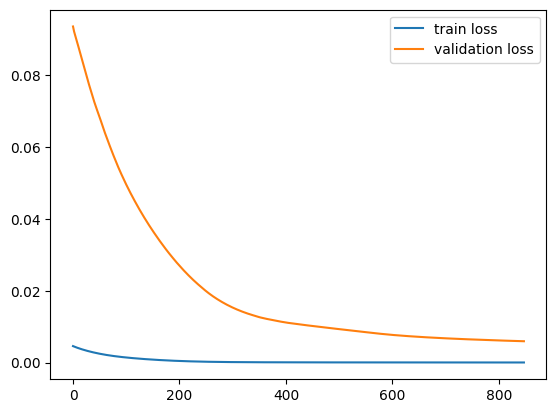

In [33]:
plt.plot(train_losses, label='train loss')
plt.plot(validation_losses, label='validation loss')
plt.legend()

# Testing the model with test data

Test loss:  0.05100909620523453


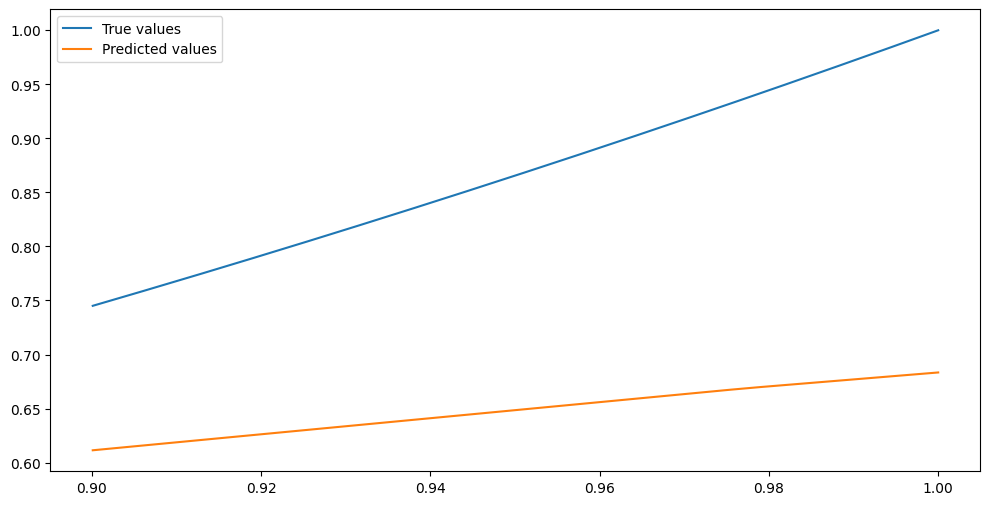

In [35]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)
    test_loss = loss_fn(y_pred, y_test)
    print('Test loss: ', test_loss.item())

plt.figure(figsize=(12, 6))
plt.plot(X_test, y_test, label='True values')
plt.plot(X_test, y_pred.detach().numpy(), label='Predicted values')
plt.legend()